# PURE COORDINATE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

# Define the neural network model
class ThreeLayerClassifier(nn.Module):
    def __init__(self, input_size, hidden_size1, output_size):
        super(ThreeLayerClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size1, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Define the dataset
df = pd.read_csv("../data-gathering/yolov8_extracted/erwin-angel.csv")
target_tensor = torch.tensor(df["class"].values, dtype=torch.float32).unsqueeze(1)
input_tensor = df.drop(df.columns[0], axis=1)
input_tensor = torch.tensor(input_tensor.values, dtype=torch.float32)

# Create a TensorDataset
dataset = TensorDataset(input_tensor, target_tensor)

# Initialize the DataLoader
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
input_size = 8
hidden_size1 = 4
output_size = 1

model = ThreeLayerClassifier(input_size, hidden_size1, output_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 400
best_loss = float('inf')
best_model_state = None

for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
    
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print progress
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
        # Check if the current model has the lowest loss
        if loss.item() < best_loss:
            best_loss = loss.item()
            best_model_state = model.state_dict()

# Save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'MODEL/angel/erwin_best.pth')

# Test the model with a new input
new_input = torch.rand(1, 8)
predicted_output = model(new_input)
predicted_class = 1 if predicted_output.item() > 0.5 else 0

print(f'New input: {new_input.numpy()}')
print(f'Predicted output: {predicted_output.item()}, Predicted class: {predicted_class}')


# SCIKIT-LEARN

Accuracy: 0.89
Confusion Matrix:
[[ 46  78]
 [  8 664]]


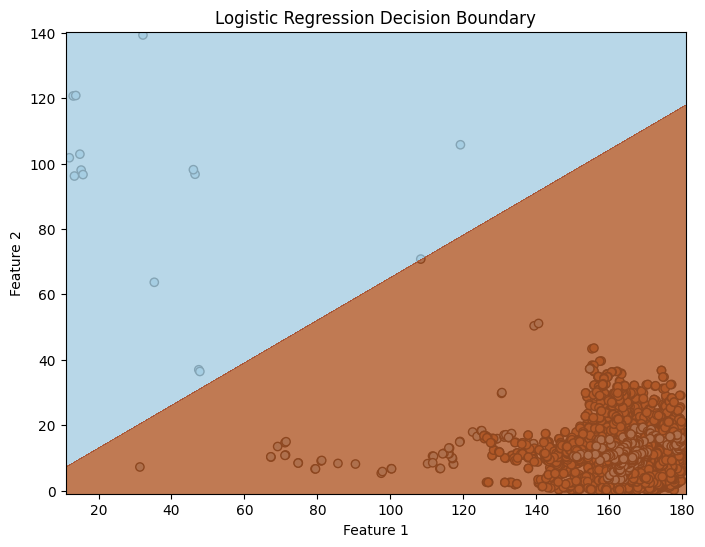

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

import pandas as pd
import joblib

# Define the dataset
df = pd.read_csv("../data-gathering/yolov8_extracted_angel/erwin-angel.csv")
y = df["class"].values
X = df.drop(df.columns[0], axis=1).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Assuming 'model' is your trained LogisticRegression model
model_path = 'MODEL/angel/logistic_regression.pkl'
joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the decision boundary (for visualization purposes)
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Plot decision boundary
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Extend the meshgrid for 8 features
mesh_input = np.c_[xx.ravel(), yy.ravel()]
for i in range(2, 8):
    mesh_input = np.c_[mesh_input, np.zeros_like(mesh_input[:, 0])]

Z = model.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



In [ ]:
import pandas as pd
import numpy as np

# Generate random data for the DataFrame
np.random.seed(42)
num_samples = 100

data = {
    'class': torch.randint(0, 2, (num_samples,)),
}

for i in range(1 ,34):
    data[f"x{i}"] = torch.rand(num_samples)
    data[f"y{i}"] = torch.rand(num_samples)
    data[f"z{i}"] = torch.rand(num_samples)

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


In [ ]:
import pandas as pd
import torch

# Your input data
input_data = [
    {'x': 0.4978089928627014, 'y': 0.43863680958747864, 'z': -0.22711889445781708, 'visibility': 0.9999940395355225},
    {'x': 0.5025001764297485, 'y': 0.430571585893631, 'z': -0.21745352447032928, 'visibility': 0.9999876022338867},
    {'x': 0.5049259066581726, 'y': 0.4312465190887451, 'z': -0.2174386978149414, 'visibility': 0.9999890327453613},
    # Add more data as needed
]

# Convert input data to DataFrame
df_data = {'class': torch.randint(0, 2, (len(input_data),))}
for i, entry in enumerate(input_data, start=1):
    df_data[f'x{i}'] = entry['x']
    df_data[f'y{i}'] = entry['y']
    df_data[f'z{i}'] = entry['z']

# Create the DataFrame
df = pd.DataFrame(df_data)

# Display the DataFrame
print(df.head())

In [ ]:
import pandas as pd
import torch

# Create a sample DataFrame
data = {
    'class': torch.randint(0, 2, (5,)),
    'x1': torch.rand(5),
    'y1': torch.rand(5),
    'z1': torch.rand(5),
    'x2': torch.rand(5),
    'y2': torch.rand(5),
    'z2': torch.rand(5),
}

df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Check the type of df
print(f"Type of df: {type(df)}")

# Add a new row to the DataFrame
new_row = {
    'class': torch.randint(0, 2, (1,)).item(),
    'x1': torch.rand(1).item(),
    'y1': torch.rand(1).item(),
    'z1': torch.rand(1).item(),
    'x2': torch.rand(1).item(),
    'y2': torch.rand(1).item(),
    'z2': torch.rand(1).item(),
}

# Check the type of new_row
print(f"Type of new_row: {type(new_row)}")

# Use DataFrame's append method
df = df.append(new_row, ignore_index=True)

# Display the DataFrame with the new row
print("\nDataFrame with New Row:")
print(df)
